<a href="https://colab.research.google.com/github/Shwethaa-R/Deep-Learning-Activity-5/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recurrent Neural Network

# Part 1 - Data Preprocessing

### Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Description of Dataset: It is the stock price dataset of Google for five years from 2012 to 2016. There are two CSV files, namely- Google_Stock_Price_Train.csv and Google_Stock_Price_Test.csv. The former dataset contains six columns, of which the column ‘Open’ (which stands for Open Google Stock Prices) is the one to be predicted. The dataset contains 1258 records. The latter also contains the same six columns and 20 records.

In [ ]:
dataset_train = pd.read_csv('/content/drive/My Drive/Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

### Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

### Creating a data structure with 60 timesteps and 1 output

In [ ]:
# The model will remember up to 60 previous timesteps to make the predictions 
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

### Reshaping

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

### Initialising the RNN

In [ ]:
regressor = Sequential()

### RNN Architecture

In [ ]:
regressor.add(SimpleRNN(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(SimpleRNN(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(SimpleRNN(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(SimpleRNN(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))
regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 60, 50)            2600      
_________________________________________________________________
dropout (Dropout)            (None, 60, 50)            0         
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 60, 50)            5050      
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 60, 50)            5050      
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 50)                5

### Compiling the RNN

In [ ]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Fitting the RNN to the Training Set

In [ ]:
history = regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 5s 52ms/step - loss: 0.5205
Epoch 2/100
38/38 [==============================] - 2s 52ms/step - loss: 0.2807
Epoch 3/100
38/38 [==============================] - 2s 53ms/step - loss: 0.2036
Epoch 4/100
38/38 [==============================] - 2s 52ms/step - loss: 0.1529
Epoch 5/100
38/38 [==============================] - 2s 52ms/step - loss: 0.1215
Epoch 6/100
38/38 [==============================] - 2s 51ms/step - loss: 0.0858
Epoch 7/100
38/38 [==============================] - 2s 52ms/step - loss: 0.0848
Epoch 8/100
38/38 [==============================] - 2s 52ms/step - loss: 0.0671
Epoch 9/100
38/38 [==============================] - 2s 52ms/step - loss: 0.0533
Epoch 10/100
38/38 [==============================] - 2s 52ms/step - loss: 0.0504
Epoch 11/100
38/38 [==============================] - 2s 52ms/step - loss: 0.0459
Epoch 12/100
38/38 [==============================] - 2s 52ms/step - loss: 0.0370
Epoch 13/100
38/38 [=====

# Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [ ]:
dataset_test = pd.read_csv('/content/drive/My Drive/Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

### Getting the predicted stock price of 2017

In [ ]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

### Visualizing the results

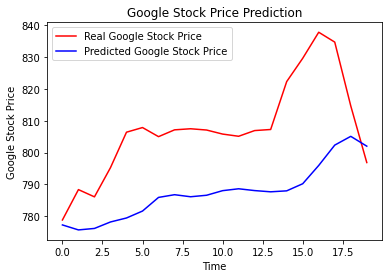

In [ ]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

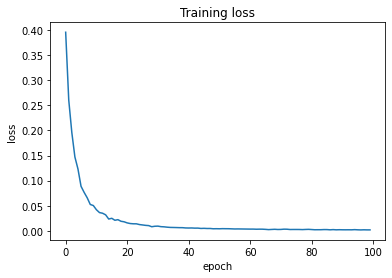

In [ ]:
plt.plot(history.history['loss'])
plt.title('Training loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

### R2 Score of the Model

In [ ]:
from sklearn.metrics import r2_score
round(r2_score(real_stock_price, predicted_stock_price),2)

-1.44